__Competition title:__  House Prices - Advanced Regression Techniques 

__Project Background:__   The objective was to predict houses’ prices based on houses’ information such as area, location, quality, age, etc.


In [2]:
# import some packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import GridSearchCV
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [3]:
# Read the data set
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_ID = test['Id']

In [4]:
#display all the columns
pd.set_option('max_columns',None)
pd.set_option('max_row',None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
# observe the top 5 training data
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Dataset overview

## Features Overview

In [5]:
# merge the train set and test set
ntrain = train.shape[0]
ntest = test.shape[0]
train_labels = train['SalePrice'].values
all_data = pd.concat((train, test)).reset_index(drop=True)
# Drop the Id column and SalePrice column
all_data.drop(['Id'], axis=1, inplace = True)
all_data.drop(['SalePrice'], axis=1, inplace = True)
print("The size of all_data is:",all_data.shape)

The size of all_data is: (2919, 79)


The full data set has a large number of features(79), while it has a relatively small number of samples(2919). 

In [6]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.00000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00000,Gd,TA,PConc,Gd,TA,No,GLQ,706.00000,Unf,0.00000,150.00000,856.00000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.00000,0.00000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00000,RFn,2.00000,548.00000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.00000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.00000,Unf,0.00000,284.00000,1262.00000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.00000,1.00000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00000,RFn,2.00000,460.00000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.00000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.00000,Unf,0.00000,434.00000,920.00000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.00000,0.00000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00000,RFn,2.00000,608.00000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.00000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.00000,Unf,0.00000,540.00000,756.00000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.00000,0.00000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00000,Unf,3.00000,642.00000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.00000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.00000,Unf,0.00000,490.00000,1145.00000,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.00000,0.00000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00000,RFn,3.00000,836.00000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# Data processing

## Observe Missing data

In [7]:
missing_df = all_data.isnull().sum()
missing_df = missing_df.drop(missing_df[missing_df == 0].index).sort_values(ascending=False)

missing_df = pd.DataFrame({'missing_count': missing_df})
missing_df['missing_rate'] = (missing_df['missing_count'] / len(all_data)) * 100
missing_df

,missing_count,missing_rate
PoolQC,2909,99.65742
MiscFeature,2814,96.40288
Alley,2721,93.21686
Fence,2348,80.43851
FireplaceQu,1420,48.64680
LotFrontage,486,16.64954
GarageFinish,159,5.44707
GarageYrBlt,159,5.44707
GarageQual,159,5.44707
GarageCond,159,5.44707


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'PoolQC'),
  Text(1, 0, 'MiscFeature'),
  Text(2, 0, 'Alley'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'FireplaceQu'),
  Text(5, 0, 'LotFrontage'),
  Text(6, 0, 'GarageFinish'),
  Text(7, 0, 'GarageYrBlt'),
  Text(8, 0, 'GarageQual'),
  Text(9, 0, 'GarageCond'),
  Text(10, 0, 'GarageType'),
  Text(11, 0, 'BsmtExposure'),
  Text(12, 0, 'BsmtCond'),
  Text(13, 0, 'BsmtQual'),
  Text(14, 0, 'BsmtFinType2'),
  Text(15, 0, 'BsmtFinType1'),
  Text(16, 0, 'MasVnrType'),
  Text(17, 0, 'MasVnrArea'),
  Text(18, 0, 'MSZoning'),
  Text(19, 0, 'BsmtFullBath'),
  Text(20, 0, 'BsmtHalfBath'),
  Text(21, 0, 'Utilities'),
  Text(22, 0, 'Functional'),
  Text(23, 0, 'Exterior2nd'),
  Text(24, 0, 'Exterior1st')])

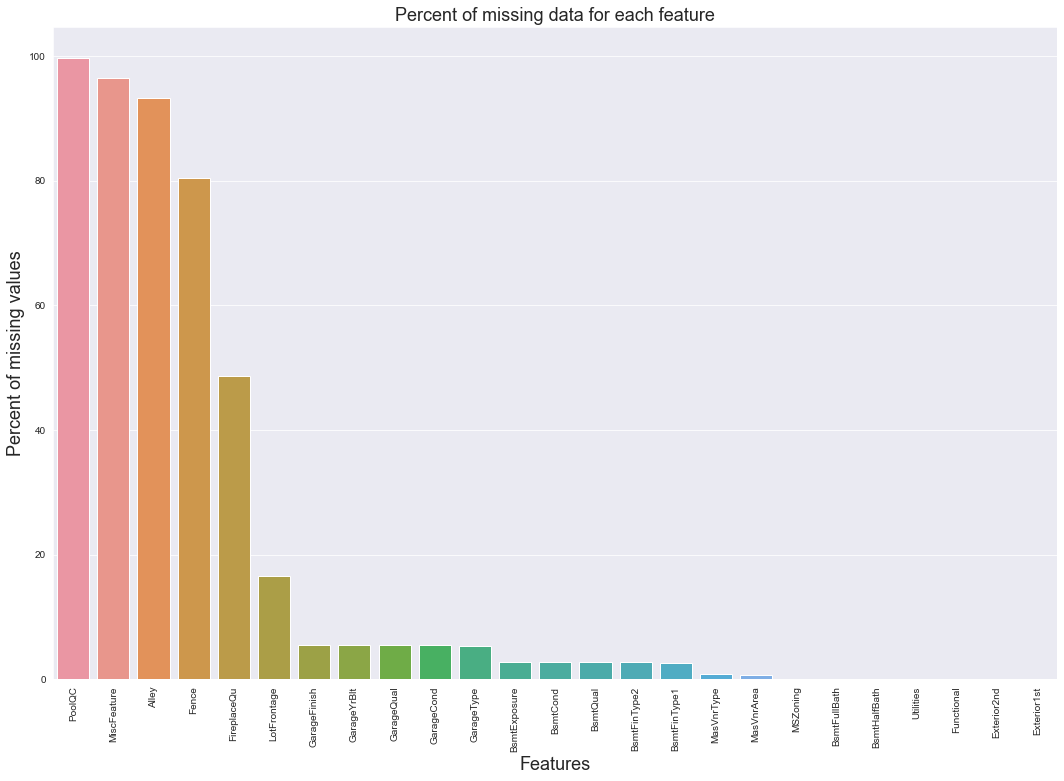

In [8]:
# plot a bar plot
fig, ax = plt.subplots(figsize = (18,12))
sns.barplot(x = missing_df['missing_rate'][:25].index, y = missing_df['missing_rate'][:25])
plt.xlabel('Features', fontsize=18)
plt.ylabel('Percent of missing values', fontsize=18)
plt.title('Percent of missing data for each feature', fontsize=18)
plt.xticks(rotation='90')


We can see that there are 34 features that have missing values. Among those features, PoolQC, MiscFeature, Alley Fence these 4 features have very high missing ratios(higher than 80%)

## Process the missing data

We can classify the 34 features into several categories:
+ PoolQC, MiscFeature, Alley  

They have more than 90% missing values, it is better to drop them directly.
+ GarageXXXX, BsmtXXXX, MasVnrXXXX, Fence, FireplaceQu

It is possible that some houses don't have those facilities, so those features have some missing values.
Consider replace the null values by "None"（for categorical features） or 0（for numerical features）
+ Functional

As is suggested in the dataset description file, we can replace the missing values by typical ("Typ")
+ SaleType, Electrical, Utilities, Exterior{X}, KitchenQual, MSSubClass

The missing rates of these features are relatively small, so it is possible that those values are simplily missing. Consider replacing the null values by mode.
+ MSZoning, LotFrontage

These 2 features may be related to the neighborhood where the houses are. So consider replacing the null values by the mode or median in the neighborhood.

In [9]:
# drop the features that have more than 90% missing values
all_data = all_data.drop('PoolQC', axis = 1)
all_data = all_data.drop('MiscFeature', axis = 1)
all_data = all_data.drop('Alley', axis = 1)

In [10]:
# The possible reason why some features are missing is that the houses don't have those facilities
# For the categorical features, fill in "None" 
# For the numerical features, fill in 0

# Features about Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
# Features about Basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
# Features about Masonry veneer
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
# Features about Fence
all_data["Fence"] = all_data["Fence"].fillna("None")
# Features about Fireplace
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [11]:
# For feature "Functional", replace the missing values by typical ("Typ")
all_data["Functional"] = all_data["Functional"].fillna("Typ")
# For those careless missing values, replace them by mode
for col in ('Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType' , 'Utilities'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
# For MSZoning, LotFrontage, replace the null values by the mode or median in the neighborhood
all_data['MSZoning'] = all_data.groupby(['Neighborhood'])['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
all_data['LotFrontage'] = all_data.groupby(['Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [12]:
# Check if there are missing values left
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio


We can see that all the missing values have been filled.

Before the regression analysis, we should detect whether the feature values follow the normal distribution

## Normal distribution detection

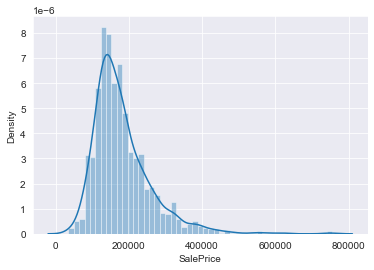

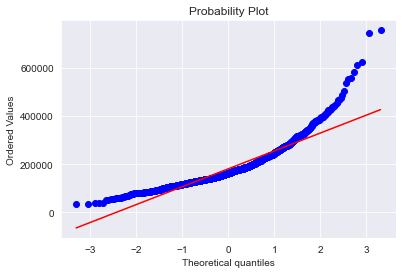

In [13]:
fig = plt.figure()
sns.distplot(train['SalePrice'])
fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

It is clear to see in the figure that SalePrice is right skewed.
We can apply log transformation to normalize the SalePrice shape.

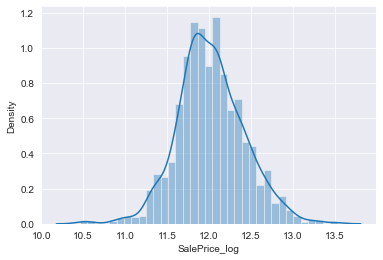

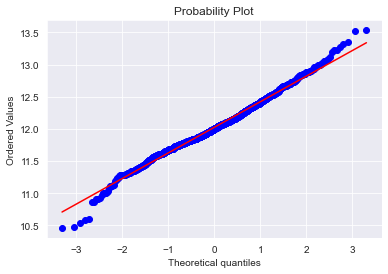

In [14]:
train['SalePrice_log'] = np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice_log'])
fig = plt.figure()
stats.probplot(train['SalePrice_log'], plot=plt)
plt.show()
train_labels_log = train['SalePrice_log'].values

Now the distribution is closed to normal distribution

## Remove outliers

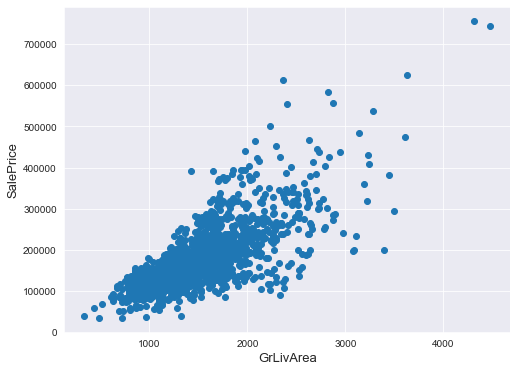

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(train['GrLivArea'],train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

We can find 2 outliers on the right corner

In [51]:
# remove the outliers
outliers_id = train[(train.GrLivArea>4000) & (train.SalePrice<200000)].index
print(outliers_id)
train.drop(outliers_id, inplace = True)
# train_labels = np.delete(train_labels, outliers_id)
# train_labels_log = np.delete(train_labels_log, outliers_id)

Int64Index([], dtype='int64')


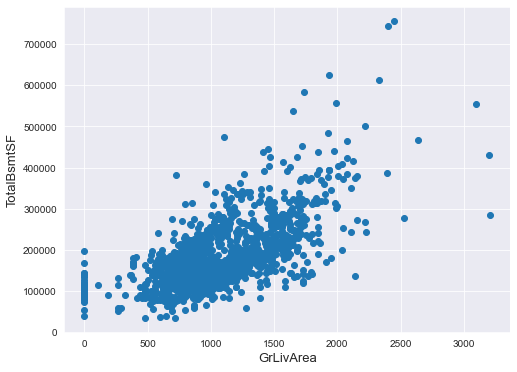

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(train['TotalBsmtSF'], train['SalePrice'])
plt.ylabel('TotalBsmtSF', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [ ]:
# remove the outliers
outliers_id = train[(train.TotalBsmtSF>6000) & (train.SalePrice<200000)].index
print(outliers_id)
train.drop(outliers_id, inplace = True)
# train_labels = np.delete(train_labels, outliers_id)
# train_labels_log = np.delete(train_labels_log, outliers_id)

# Exploratory data analysis

## Correlation analysis

<AxesSubplot:>

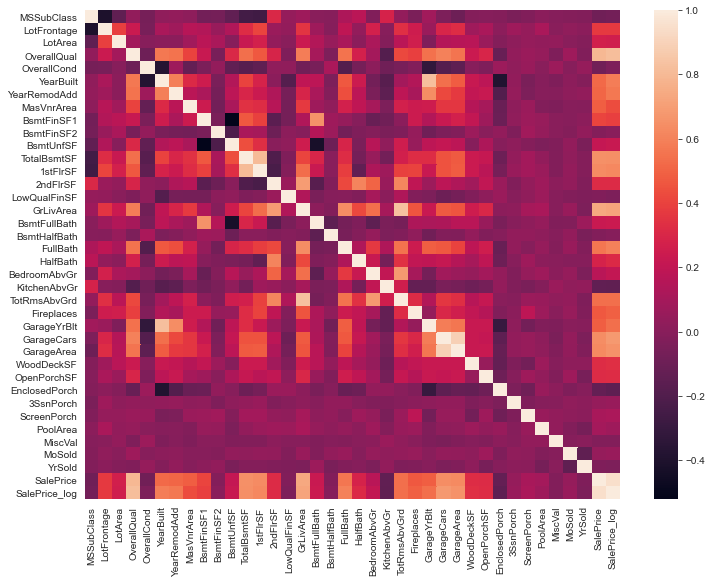

In [17]:
# plot heatmap
train_corr = train.drop('SalePrice_log',axis = 1)
train_corr = train.drop('Id',axis = 1)
corr_mat = train_corr.corr()
fig, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corr_mat)

<AxesSubplot:>

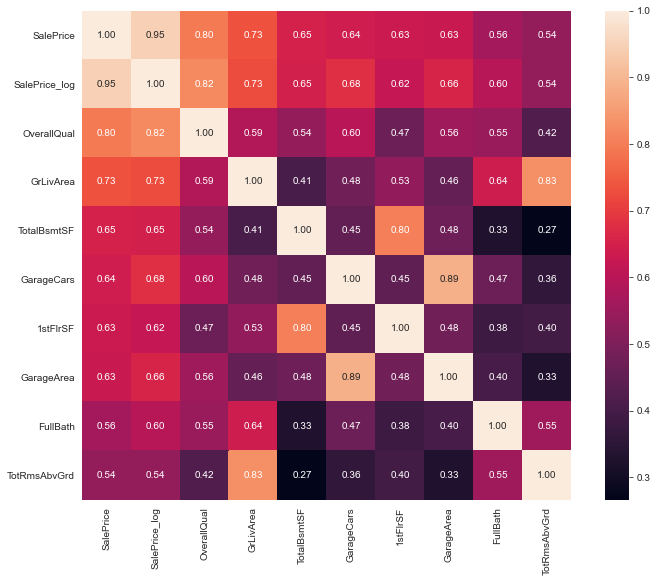

In [18]:
# Select top 10 features that are strongly correlated to SalePrice
k = 10 # the number of features selected
cols = corr_mat.nlargest(k, 'SalePrice')['SalePrice'].index
corr_mat_top_k = np.corrcoef(train[cols].values.T)
fig, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corr_mat_top_k, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

According to the heatmap, we can see that:
- OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt are the top 10 features most correlated to SalePrice.
- GarageCars and GarageArea are strongly correlated, this may cause the problem of multicollinearity. Consider delete one of them.
- TotalBsmtSF and 1stFlrSF are also strongly correlated.

__Let's see those features one by one__

## Important features analysis

__OverallQual__

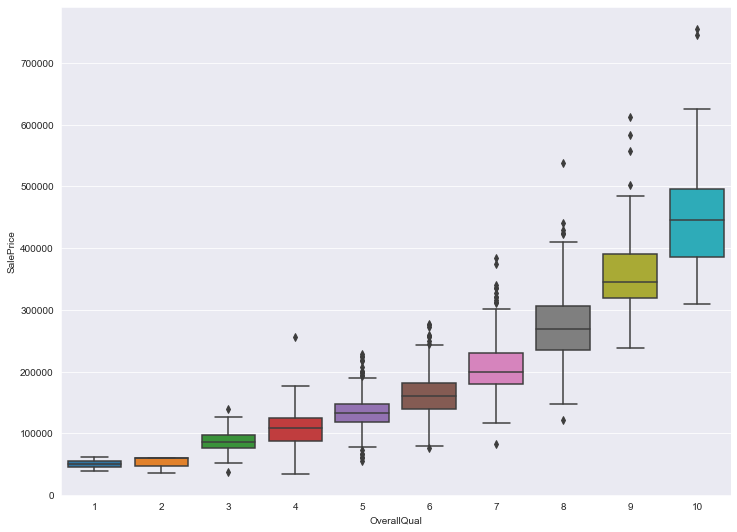

In [19]:
# Use boxplot to see the relationship between overall quality and sale price.
fig, ax = plt.subplots(figsize = (12, 9))
fig = sns.boxplot(x = train['OverallQual'], y = train['SalePrice'])

It is clear to see in the plot that with the increase of the overall quality, the sale price will increase accordingly.

__GrLivArea__

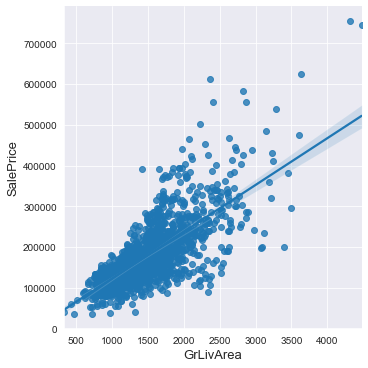

In [20]:
# plot regression figure
sns.lmplot(data = train, x = 'GrLivArea', y = 'SalePrice')
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

As is shown in the figure, GrLivArea is positively correlated with SalePrice.

__GarageCars__

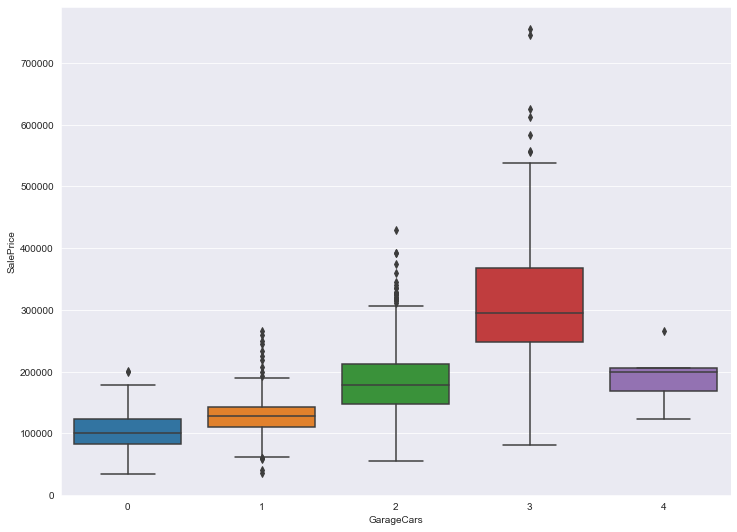

In [21]:
fig, ax = plt.subplots(figsize = (12, 9))
fig = sns.boxplot(x = train['GarageCars'], y = train['SalePrice'])

GarageCars show the number of cars that a garage can contain. when the number is less or equal to 3, the SalePrice increases with GarageCars. However, when GarageCars equal to 4, the SalePrice is smaller than it is when GarageCars equal to 3. This is different from our common sense.

To figure out the reason that causes this strange trend, I calculate the number of samples for different values of "GarageCars"

In [22]:
print('The number of houses that have garages that can contain 1 cars is: ', len(train[train['GarageCars'] == 1]))
print('The number of houses that have garages that can contain 2 cars is: ', len(train[train['GarageCars'] == 2]))
print('The number of houses that have garages that can contain 3 cars is: ', len(train[train['GarageCars'] == 3]))
print('The number of houses that have garages that can contain 4 cars is: ', len(train[train['GarageCars'] == 4]))

The number of houses that have garages that can contain 1 cars is:  369
The number of houses that have garages that can contain 2 cars is:  823
The number of houses that have garages that can contain 3 cars is:  180
The number of houses that have garages that can contain 4 cars is:  5


There are only 5 houses that have garages that can contain 4 cars. So this phenomenon is caused by coincidence. The number of samples are not enough.

__GarageArea__

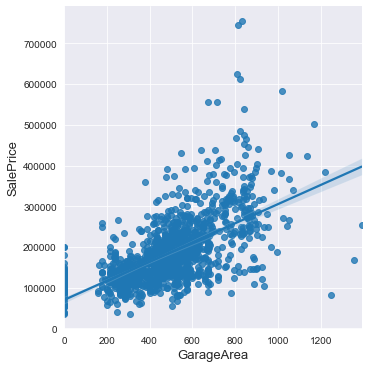

In [23]:
# plot regression figure
sns.lmplot(data = train, x = 'GarageArea', y = 'SalePrice')
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.show()

As is shown in the figure, GrLivArea is positively correlated with SalePrice.

__TotalBsmtSF__

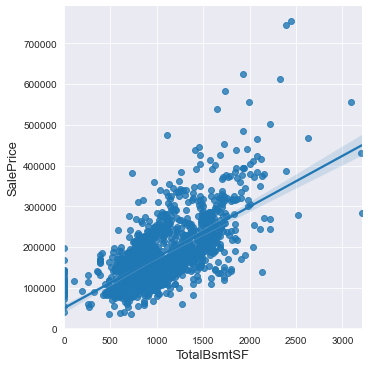

In [24]:
# plot regression figure
sns.lmplot(data = train, x = 'TotalBsmtSF', y = 'SalePrice')
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

As is shown in the figure, TotalBsmtSF is also positively correlated with SalePrice.

__1stFlrSF__

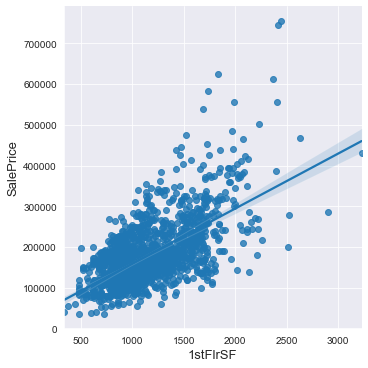

In [25]:
# plot regression figure
sns.lmplot(data = train, x = '1stFlrSF', y = 'SalePrice')
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('1stFlrSF', fontsize=13)
plt.show()

1stFlrSF means the area of the First Floor. As is shown in the figure, 1stFlrSF is also positively correlated with SalePrice. This is consistent with our common sense.Generally speaking, The bigger the area is, the higher the price is.

__FullBath__

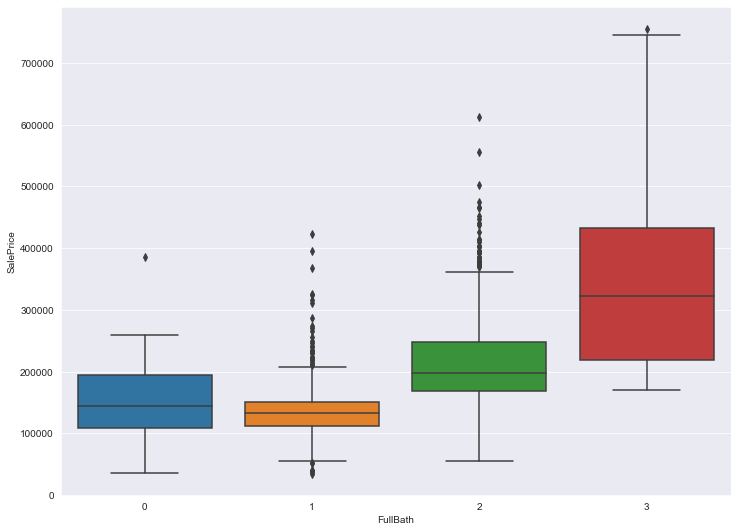

In [26]:
fig, ax = plt.subplots(figsize = (12, 9))
fig = sns.boxplot(x = train['FullBath'], y = train['SalePrice'])

FullBath shows the number of full bathrooms that a house has.
full bathrooms typically consists of a sink, a shower, a bathtub, and a toilet.
According to the boxplot, generally the more the full bathrooms are, the higher the price is.

__TotRmsAbvGrd__

TotRmsAbvGrd means the total rooms above grade (does not include bathrooms)

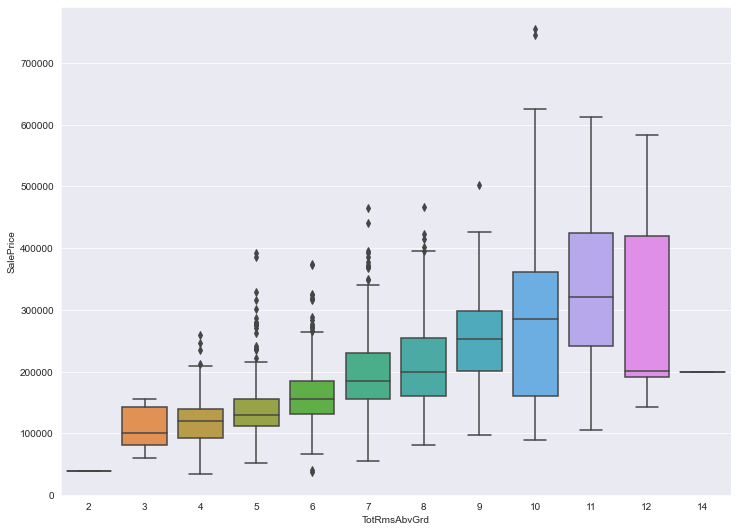

In [27]:
fig, ax = plt.subplots(figsize = (12, 9))
fig = sns.boxplot(x = train['TotRmsAbvGrd'], y = train['SalePrice'])

Generally, TotRmsAbvGrd is positively correlated to SalePrice

__YearBuilt__

count   1458.00000
mean    1971.21811
std       30.19375
min     1872.00000
25%     1954.00000
50%     1972.50000
75%     2000.00000
max     2010.00000
Name: YearBuilt, dtype: float64

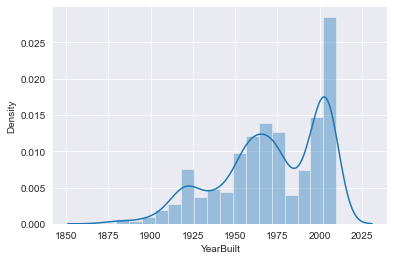

In [28]:
sns.distplot(train['YearBuilt'])
train['YearBuilt'].values
train['YearBuilt'].describe()

The built time of the houses ranges from 1872 to 2010

In [29]:
train['SalePrice'].describe()

count     1458.00000
mean    180932.91907
std      79495.05528
min      34900.00000
25%     129925.00000
50%     163000.00000
75%     214000.00000
max     755000.00000
Name: SalePrice, dtype: float64

We can classify the SalePrice into 4 groups according to lower quartile, median, and upper quartile.

In [30]:
def divide_saleprice_group(sale_price):
    if sale_price <= 129975:
        return '25% and less'
    if sale_price > 129975 and sale_price <= 163000:
        return '25% - 50%'
    if sale_price > 163000 and sale_price < 214000:
        return '50% - 75%'
    if sale_price >= 214000:
        return '75% and more'

train['SalePriceGroup'] = train['SalePrice'].apply(divide_saleprice_group)

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

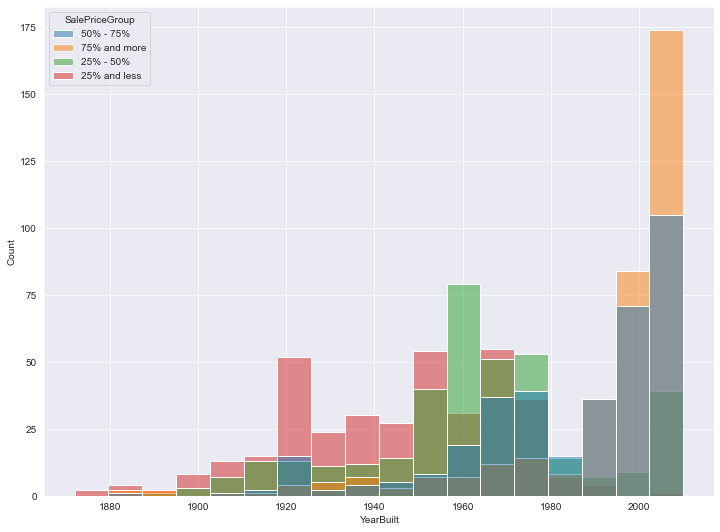

In [31]:
fig, ax = plt.subplots(figsize=(12,9))
sns.histplot(x='YearBuilt', hue='SalePriceGroup', data=train)

As we can see in the figure, the expensive houses are normally built recently, and cheaper houses are usually older houses. We can create a new feature according to this trend.

# Feature engineering

## Feature preprocessing

There are some categorical features that consists of strings that cannot be understood by the model. 
Those features can be classified into two categories:
- Ordinal variable  
For ordinal variable, we can use __Label Encoding__. Label encoding converts the categorical variables into numerical variables. And the order of the converted numerical variable is consistent with the original categorical variables.
- Unordered variable  
For unordered variable, we can use __One Hot Encoding__. One Hot Encoding uses N-bit status register to encode N states, each state has its own independent register bit, and at any time, only one of them is effective.

In [32]:
# For Ordinal variables, use Label Encoding to convert the categorical variables into numerical variables

from sklearn.preprocessing import LabelEncoder

Ord_var = ('ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond','BsmtFinType1',  'BsmtExposure',
        'BsmtFinType2', 'HeatingQC', 'KitchenQual' , 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 
        'LandSlope', 'Street', 'Fence','PavedDrive', 'CentralAir',
        'LotShape','MSSubClass')
for col in Ord_var:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[col].values)) 
    all_data[col] = lbl.transform(list(all_data[col].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 76)


Before the One Hot Encoding, we need to create new features first.

## Feature Extraction

In [33]:

all_data['AvgRoomSF'] = all_data['GrLivArea'] / all_data['TotRmsAbvGrd']
all_data['OverallHouseQC'] = all_data['OverallQual'] + all_data['OverallCond']
all_data['IsNeighborhoodElite'] = (all_data['Neighborhood'].isin(['NridgHt', 'CollgeCr', 'Crawfor', 'StoreBr', 'Timber'])) * 1 
all_data['HasFireplace'] = all_data['Fireplaces'].apply(lambda x: int(x > 0))
all_data['TotalBathrooms'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +
                                all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))
all_data['IsPavedDrive'] = (all_data['PavedDrive'] == 'Y') * 1
all_data['ExterQC'] = all_data['ExterQual'] + all_data['ExterCond']
all_data['IsGasHeating'] = all_data['Heating'].map({'GasA': 1, 'GasW': 1, 'Grav': 0, 'Wall': 0, 'OthW': 0, 'Floor': 0})
year_built_bins = np.linspace(1871, 2010, 10) 
all_data['YearBuiltBin'] = pd.cut(all_data['YearBuilt'], bins=year_built_bins, labels=range(1, 10)) 
all_data['YearBuiltBin'] = all_data['YearBuiltBin'].astype('int')
all_data['HouseAge'] = all_data['YrSold'] - all_data['YearBuilt'].astype('int')
all_data['IsRecentlyBuilt'] = (all_data['YearBuilt'] == all_data['YrSold'].astype(int)) * 1
all_data['IsRecentlyRemod'] = (all_data['YearRemodAdd'] == all_data['YrSold'].astype(int)) * 1 
all_data['NeighborhoodGroups'] = all_data['Neighborhood'].map({
        'MeadowV': 0,
        'IDOTRR': 1,
        'BrDale': 1,
        'OldTown': 1,
        'Edwards': 1,
        'BrkSide': 1,
        'Sawyer': 1,
        'Blueste': 1,
        'SWISU': 2,
        'NAmes': 2,
        'NPkVill': 2,
        'Mitchel': 2,
        'SawyerW': 2,
        'Gilbert': 2,  
        'NWAmes': 2,   
        'Blmngtn': 2,  
        'CollgCr': 2,  
        'ClearCr': 3,  
        'Crawfor': 3,  
        'Veenker': 3,  
        'Somerst': 3,  
        'Timber': 3,   
        'StoneBr': 4, 
        'NoRidge': 4, 
        'NridgHt': 4,
    })
all_data['FunctionalGroup'] = all_data['Functional'].map({
        'Typ': 2,
        'Min1': 1,
        'Min2': 1,
        'Mod': 1,
        'Maj1': 0,
        'Maj2': 0,
        'Sev': 0,
        'Sav': 0,
    })

all_data['IsNewElectrBreakers'] = all_data['Electrical'].map({'SBrkr': 1, 'FuseF': 0, 'FuseA': 0, 'FuseP': 0, 'Mix': 0})
all_data['RoofMatlCost'] = all_data['RoofMatl'].map({
        'CompShg': 0,
        'WdShake': 1,
        'ClyTile': 1,
        'WdShngl': 1,
        'Roll': 0,
        'Metal': 1,
        'Membran': 0,
        'Tar&Grv': 0,
    })
all_data['IsWoodenRoof'] = all_data['RoofMatl'].map({
        'CompShg': 0,
        'WdShake': 1,
        'ClyTile': 0,
        'WdShngl': 1,
        'Roll': 0,
        'Metal': 0,
        'Membran': 0,
        'Tar&Grv': 0,
    })
all_data['Season'] = all_data['MoSold'].map({
    12: 0, 1: 0, 2: 0,
    3: 1, 4: 1, 5: 1, 
    6: 2, 7: 2, 8: 2, 
    9: 3, 10: 3, 11: 3,
})

In [34]:
# After creating new features, some previous features are not necessary since they contain similar information
# Drop these previous features
to_drop_my = ['YearBuilt', 'YrSold', 'Neighborhood', 'Functional', 'Electrical', 'RoofMatl', 'MoSold', 'OverallQual', 'OverallCond', 'Fireplaces', 'FullBath','HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'ExterQual', 'ExterCond']
all_data = all_data.drop(columns = to_drop_my)

In [35]:
# After creating new features, carry out one hot encoding to Unordered variables
all_data = pd.get_dummies(all_data)

In [36]:
all_data.shape

(2919, 182)

## Transform the features into normal distribution

In [37]:
from scipy.special import boxcox1p
 
trans_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
     '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
     'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

lam = 0.15     # 100 * (1-lam)% confidence
for col in trans_cols:
    all_data[col] = boxcox1p(all_data[col], lam)  

# Modelling and prediction

In [ ]:
# Split the data set
train_final = all_data[: (ntrain ) ]
test_final = all_data[(ntrain ):]

## Ridge model

Text(0, 0.5, 'CV Error')

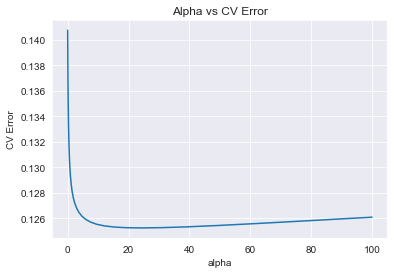

In [39]:
# Ridge model
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
test_scores = []
alphas = np.logspace(-3, 2, 50)
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf,train_final, train_labels_log, cv = 10, scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error")
plt.xlabel('alpha')
plt.ylabel('CV Error')


In [40]:
index = np.argmin(test_scores)
best_alpha = alphas[index]
print('The best alpha is:', alphas[index])
print('The test RMSLE score is:', test_scores[index])

The best alpha is: 24.420530945486497
The test RMSLE score is: 0.12524517740184302


In [41]:
# use the best alpha to train the model
clf = Ridge(alpha=best_alpha)
clf.fit(train_final,train_labels_log)
#  predict the house prices in the test data set
log_predict = clf.predict(test_final)
predict = np.expm1(log_predict)

submis = pd.DataFrame()
submis['Id'] = test_ID
submis['SalePrice'] = predict
submis.head(10)


,Id,SalePrice
0,1461,117527.71653
1,1462,152728.18237
2,1463,183739.60583
3,1464,198977.38996
4,1465,205164.77790
5,1466,172824.32044
6,1467,184750.93750
7,1468,164974.06690
8,1469,191553.63189
9,1470,121581.67510


In [42]:
submis.to_csv('submission_ridge.csv',index=False)

## XGBoost model

XGBoost model mainly has the following parameters:

'learning_rate', 'n_estimators', 'max_depth', 'min_child_weight', 'seed', 'subsample', 'colsample_bytree', 'gamma', 'reg_alpha', 'reg_lambda'

Use grid search to find the best paramters.

In [43]:
# Find the best 'n_estimators'
import xgboost as xgb
cv_params = {'n_estimators': [400, 500, 600, 700, 800]}
other_params = {'learning_rate': 0.1, 'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(train_final, train_labels_log)
print('Best parameters：{0}'.format(optimized_GBM.best_params_))
print('Best score:{0}'.format(np.sqrt(-optimized_GBM.best_score_)))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:   47.7s finished


Best parameters：{'n_estimators': 400}
Best score:0.124225602825454


In [44]:
# Find the best 'max_depth' and 'min_child_weight'
cv_params = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'min_child_weight': [1, 2, 3, 4, 5, 6]}
other_params = {'learning_rate': 0.1, 'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(train_final, train_labels_log)
print('Best parameters：{0}'.format(optimized_GBM.best_params_))
print('Best score:{0}'.format(np.sqrt(-optimized_GBM.best_score_)))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   35.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:  4.8min finished


Best parameters：{'max_depth': 3, 'min_child_weight': 4}
Best score:0.12049420092228305


In [45]:
# Find the best 'gamma'
cv_params = {'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}
other_params = {'learning_rate': 0.1, 'n_estimators': 400, 'max_depth': 3, 'min_child_weight': 3, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(train_final, train_labels_log)
print('Best parameters：{0}'.format(optimized_GBM.best_params_))
print('Best score:{0}'.format(np.sqrt(-optimized_GBM.best_score_)))

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  35 out of  35 | elapsed:   21.3s finished


Best parameters：{'gamma': 0}
Best score:0.12062219919110984


In [46]:
# Find the best 'subsample' and 'colsample_bytree'
cv_params = {'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]}
other_params = {'learning_rate': 0.1, 'n_estimators': 400, 'max_depth': 3, 'min_child_weight': 3, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(train_final, train_labels_log)
print('Best parameters：{0}'.format(optimized_GBM.best_params_))
print('Best score:{0}'.format(np.sqrt(-optimized_GBM.best_score_)))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   23.3s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:   45.0s finished


Best parameters：{'colsample_bytree': 0.7, 'subsample': 0.9}
Best score:0.11882431816869463


In [47]:
# Find the best 'reg_alpha' and 'reg_lambda'
cv_params = {'reg_alpha': [0, 0.05, 0.1, 1, 2, 3], 'reg_lambda': [0.05, 0.1, 1, 2, 3]}
other_params = {'learning_rate': 0.1, 'n_estimators': 400, 'max_depth': 3, 'min_child_weight': 3, 'seed': 0,
                    'subsample': 0.7, 'colsample_bytree': 0.9, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(train_final, train_labels_log)
print('Best parameters：{0}'.format(optimized_GBM.best_params_))
print('Best score:{0}'.format(np.sqrt(-optimized_GBM.best_score_)))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   29.3s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:  1.6min finished


Best parameters：{'reg_alpha': 0, 'reg_lambda': 3}
Best score:0.11860774501813169


In [48]:
# Find the best 'learning_rate'
cv_params = {'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2]}
other_params = {'learning_rate': 0.07, 'n_estimators': 400, 'max_depth': 3, 'min_child_weight': 3, 'seed': 0,
                    'subsample': 0.7, 'colsample_bytree': 0.9, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(train_final, train_labels_log)
print('Best parameters：{0}'.format(optimized_GBM.best_params_))
print('Best score:{0}'.format(np.sqrt(-optimized_GBM.best_score_)))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:   15.9s finished


Best parameters：{'learning_rate': 0.05}
Best score:0.11890300011802825


In [49]:
# Use the optimal parameters to train a XGBoost model
xgb_reg = xgb.XGBRegressor(learning_rate = 0.07, n_estimators = 400, max_depth = 3, min_child_weight = 3, seed = 0,
                    subsample = 0.7, colsample_bytree = 0.9, gamma = 0, reg_alpha = 0, reg_lambda = 1)
xgb_reg.fit(train_final,train_labels_log)
# Predict house prices in the test set
log_predict = xgb_reg.predict(test_final)
predict = np.expm1(log_predict)
submis = pd.DataFrame()
submis['Id'] = test_ID
submis['SalePrice'] = predict
submis.head(10)

,Id,SalePrice
0,1461,127945.19531
1,1462,157741.23438
2,1463,186520.89062
3,1464,197090.51562
4,1465,188417.79688
5,1466,177175.18750
6,1467,188227.78125
7,1468,167209.85938
8,1469,178144.15625
9,1470,123683.66406


In [50]:
submis.to_csv('submission_XGBOOST.csv',index=False)